# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [7]:
model = Sequential()

In [8]:
#將「輸入層」與「隱藏層1」加入模型

In [9]:
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
model.add(Dropout(0.5))

W0707 17:40:56.803818  1416 deprecation_wrapper.py:119] From C:\Users\Necrodiver\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 17:40:56.805821  1416 deprecation_wrapper.py:119] From C:\Users\Necrodiver\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0707 17:40:56.815270  1416 deprecation.py:506] From C:\Users\Necrodiver\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
#將「隱藏層2」加入模型

In [12]:
model.add(Dense(units=1000, 
                kernel_initializer='normal', 
                activation='relu'))

In [13]:
model.add(Dropout(0.5))

In [14]:
#將「輸出層」加入模型

In [15]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

W0707 17:40:57.059715  1416 deprecation.py:323] From C:\Users\Necrodiver\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 9s - loss: 0.3642 - acc: 0.8861 - val_loss: 0.1318 - val_acc: 0.9613
Epoch 2/10
 - 9s - loss: 0.1592 - acc: 0.9514 - val_loss: 0.0970 - val_acc: 0.9712
Epoch 3/10
 - 9s - loss: 0.1184 - acc: 0.9632 - val_loss: 0.0877 - val_acc: 0.9728
Epoch 4/10
 - 9s - loss: 0.0996 - acc: 0.9688 - val_loss: 0.0861 - val_acc: 0.9748
Epoch 5/10
 - 9s - loss: 0.0857 - acc: 0.9729 - val_loss: 0.0816 - val_acc: 0.9757
Epoch 6/10
 - 9s - loss: 0.0755 - acc: 0.9765 - val_loss: 0.0774 - val_acc: 0.9763
Epoch 7/10
 - 10s - loss: 0.0649 - acc: 0.9786 - val_loss: 0.0758 - val_acc: 0.9784
Epoch 8/10
 - 10s - loss: 0.0602 - acc: 0.9812 - val_loss: 0.0774 - val_acc: 0.9776
Epoch 9/10
 - 10s - loss: 0.0555 - acc: 0.9821 - val_loss: 0.0707 - val_acc: 0.9795
Epoch 10/10
 - 10s - loss: 0.0538 - acc: 0.9829 - val_loss: 0.0715 - val_acc: 0.9793


# 以圖形顯示訓練過程

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

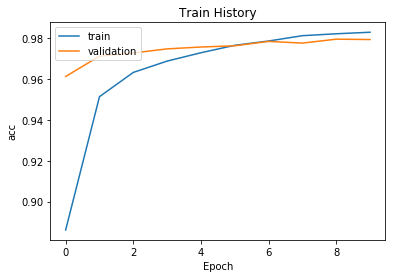

In [20]:
show_train_history(train_history,'acc','val_acc')

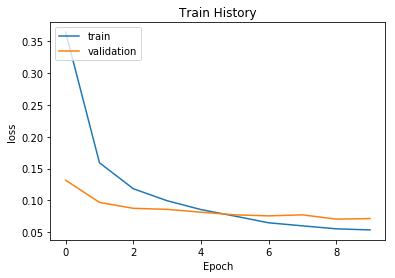

In [21]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [22]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 99us/step

accuracy= 0.9818


# 進行預測

In [23]:
prediction=model.predict_classes(x_Test)

In [24]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

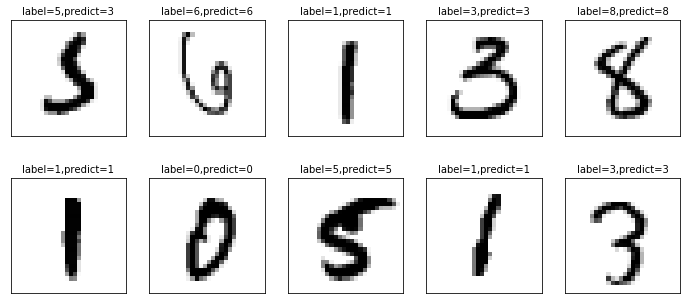

In [26]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [27]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,0,0,4,1,0,0
1,0,1129,4,0,0,0,2,0,0,0
2,2,0,1021,1,1,0,2,3,2,0
3,1,0,9,990,0,4,0,4,2,0
4,1,0,3,0,967,0,3,0,0,8
5,2,0,0,3,2,876,5,0,4,0
6,5,2,0,1,2,2,946,0,0,0
7,1,11,8,1,0,0,0,999,1,7
8,4,0,6,10,5,5,2,3,937,2


In [28]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [29]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
5937,5,3


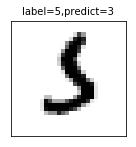

In [30]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

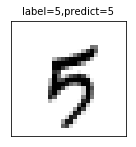

In [31]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)